In [2]:
import pandas as pd 
import gensim
from gensim.models import KeyedVectors
from sklearn.cluster import AgglomerativeClustering
import jieba
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# load the model  
model = gensim.models.KeyedVectors.load_word2vec_format('baike_26g_news_13g_novel_229g.bin',binary=True) 

In [3]:
model.most_similar('语言') #vertify whether the model is loaded.  

[('语句', 0.7241232991218567),
 ('词句', 0.6802310943603516),
 ('用语', 0.6705212593078613),
 ('肢体语言', 0.6669173240661621),
 ('中文', 0.6656090021133423),
 ('词汇', 0.6639605164527893),
 ('恶魔语', 0.659858763217926),
 ('汉语', 0.6580660343170166),
 ('通用语', 0.6569659113883972),
 ('倭语', 0.6442402601242065)]

In [38]:
texts2=["手", "人", "马", "车", "头", "声", "力", "绳子", "火车", "衣服", "姑娘", "家", "距离", "格", "儿子", "教授", "右手", "时间", "双手", "时候", "妈", "腿", "先生", "大家", "东西", "老牛", "战线", "男人", "牛", "掌", "子", "母亲", "一手", "话", "脸", "牲口", "力气", "疤", "孩子", "青年", "方向", "老人", "胡子", "眼睛", "下意识", "圈", "水", "音", "饭", "同志", "媳妇", "手榴弹", "身", "队", "飞机", "网", "妇", "兄弟", "狗", "车子", "球", "水平"]

In [39]:
from datetime import datetime
import numpy as np
start = datetime.now()
embedding2 = []

for idx, line in enumerate(texts2):
    vector = np.zeros(128)
    
    for word in line:
        
        if word not in model.key_to_index:
            vector += np.zeros(128)
        else:
            vector += model[word]
    embedding2.append(vector)
    if (idx%100==0):
        print(idx)
    
end = datetime.now() 
end-start

0


datetime.timedelta(microseconds=2992)

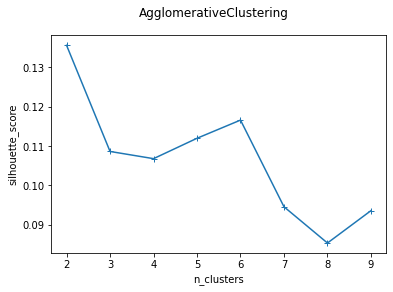

In [33]:
nums=range(2,10)
score=[]
for num in nums:
    clst=AgglomerativeClustering(n_clusters=num)
    y=clst.fit_predict(embedding2)
    score.append(silhouette_score(embedding2,y,sample_size=len(embedding2),metric='euclidean'))

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(nums,score,marker="+")
ax.set_xlabel("n_clusters")
ax.set_ylabel("silhouette_score")
fig.suptitle("AgglomerativeClustering")
plt.show()

Through the plot we can set the cluster number as 6.

In [34]:
clst=AgglomerativeClustering(n_clusters=6)
 
clst.fit_predict(embedding2)

array([4, 0, 0, 0, 2, 0, 3, 5, 0, 0, 0, 0, 1, 0, 5, 0, 4, 2, 4, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 5, 0, 4, 1, 2, 0, 3, 0, 5, 1, 2, 0, 5, 2,
       2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

This array shows the id of cluster of each word.

In [30]:
from sklearn.cluster import KMeans
n_clusters=6
kmeans = KMeans(n_clusters, random_state=1).fit(embedding2)
y_pred = kmeans.labels_
cluster_center = kmeans.cluster_centers_

In [31]:
from collections import Counter

center_dict2 = Counter(y_pred)
center_dict2

Counter({3: 8, 5: 31, 2: 2, 1: 6, 4: 4, 0: 11})

In [32]:
for n_category in range(6):
    res = np.array(texts2)[(y_pred == n_category)]
    count = 0
    print(f"Data in category {n_category}:")
    count = 0
    for word in res:
        print(f"{word}\t",end="")
        count = count + 1
        if(count % 10 == 0):
            print(f"\n")

Data in category 0:
家	距离	教授	先生	大家	东西	战线	青年	同志	兄弟	

水平	Data in category 1:
绳子	儿子	子	孩子	胡子	车子	Data in category 2:
力	力气	Data in category 3:
手	头	右手	双手	腿	一手	脸	手榴弹	Data in category 4:
衣服	母亲	饭	网	Data in category 5:
人	马	车	声	火车	姑娘	格	时间	时候	妈	

老牛	男人	牛	掌	话	牲口	疤	方向	老人	眼睛	

下意识	圈	水	音	媳妇	身	队	飞机	妇	狗	

球	

In [35]:
texts3 = ["手", "车", "人", "风箱", "犁", "洋车", "家", "话", "山", "小提琴", "绳子", "弹簧", "应力", "弦", "马", "骆驼", "屎", "衣服", "火", "头", "车子", "二胡", "胳膊", "牛", "脚", "水", "儿子", "妈", "开关", "灯", "妻子", "身子", "门", "妈妈", "衣襟", "房间", "衣角", "船", "一边", "协奏曲", "火车", "胡琴", "心", "大车", "茬", "房门", "椅子", "大家", "嘴", "袖子", "农具", "图", "声", "泔水", "低声", "丈夫", "油", "货物", "爸爸", "步", "大嫂", "时候", "东西", "队长", "姑娘", "机", "车厢", "客车", "猴", "雪橇", "物体"]

In [36]:
from datetime import datetime
import numpy as np
start = datetime.now()
embedding3 = []

for idx, line in enumerate(texts3):
    vector = np.zeros(128)
    
    for word in line:
        
        if word not in model.key_to_index:
            vector += np.zeros(128)
        else:
            vector += model[word]
    embedding3.append(vector)
    if (idx%100==0):
        print(idx)
    
end = datetime.now() 
end-start

0


datetime.timedelta(microseconds=2010)

In [37]:
fig.suptitle("AgglomerativeClustering")
from sklearn.cluster import KMeans
n_clusters=10
kmeans = KMeans(n_clusters, random_state=1).fit(embedding3)
y_pred = kmeans.labels_
cluster_center = kmeans.cluster_centers_

In [38]:
from collections import Counter

center_dict3 = Counter(y_pred)
center_dict3

Counter({5: 6, 8: 9, 2: 35, 7: 6, 4: 4, 6: 3, 3: 4, 9: 2, 1: 1, 0: 1})

In [39]:
for n_category in range(10):
    res = np.array(texts3)[(y_pred == n_category)]
    count = 0
    print(f"Data in category {n_category}:")
    count = 0
    for word in res:
        print(f"{word}\t",end="")
        count = count + 1
        if(count % 10 == 0):
            print(f"\n")

Data in category 0:
东西	Data in category 1:
丈夫	Data in category 2:
人	风箱	犁	家	话	山	小提琴	弹簧	应力	屎	

火	胳膊	牛	水	灯	门	房间	船	心	茬	

房门	大家	农具	图	泔水	油	货物	步	大嫂	时候	

队长	机	猴	雪橇	物体	Data in category 3:
妈	妈妈	爸爸	姑娘	Data in category 4:
骆驼	二胡	协奏曲	胡琴	Data in category 5:
手	弦	头	脚	一边	嘴	Data in category 6:
衣服	衣襟	衣角	Data in category 7:
绳子	儿子	妻子	身子	椅子	袖子	Data in category 8:
车	洋车	马	车子	开关	火车	大车	车厢	客车	Data in category 9:
声	低声	

In [40]:
texts4=["人", "手", "力", "门", "力量", "车", "事", "车子", "工作", "头", "问题", "会议", "棒", "石头", "地", "钱", "家", "大家", "物体", "电荷", "磁极"]

In [43]:
from datetime import datetime
import numpy as np
start = datetime.now()
embedding4 = []

for idx, line in enumerate(texts4):
    vector = np.zeros(128)
    
    for word in line:
        
        if word not in model.key_to_index:
            vector += np.zeros(128)
        else:
            vector += model[word]
    embedding4.append(vector)
    if (idx%100==0):
        print(idx)
    
end = datetime.now() 
end-start

from sklearn.cluster import KMeans
n_clusters=10
kmeans = KMeans(n_clusters, random_state=1).fit(embedding4)
y_pred = kmeans.labels_
cluster_center = kmeans.cluster_centers_

from collections import Counter

center_dict4 = Counter(y_pred)
center_dict4

0


Counter({0: 4, 4: 3, 1: 2, 7: 2, 9: 3, 2: 2, 5: 2, 6: 1, 3: 1, 8: 1})

In [44]:
for n_category in range(10):
    res = np.array(texts4)[(y_pred == n_category)]
    count = 0
    print(f"Data in category {n_category}:")
    count = 0
    for word in res:
        print(f"{word}\t",end="")
        count = count + 1
        if(count % 10 == 0):
            print(f"\n")

Data in category 0:
人	门	车	车子	Data in category 1:
力	力量	Data in category 2:
头	石头	Data in category 3:
电荷	Data in category 4:
手	会议	地	Data in category 5:
家	大家	Data in category 6:
物体	Data in category 7:
事	问题	Data in category 8:
磁极	Data in category 9:
工作	棒	钱	

In [8]:
texts5=["门", "车", "车子", "人", "自行车", "小车", "步", "力", "山", "东西", "牌九", "大家", "木筏", "字	", "代表", "恩", "水", "弓", "结果", "光", "米", "独轮车", "船", "磨", "声", "名"]

In [9]:
from datetime import datetime
import numpy as np
start = datetime.now()
embedding5 = []

for idx, line in enumerate(texts5):
    vector = np.zeros(128)
    
    for word in line:
        
        if word not in model.key_to_index:
            vector += np.zeros(128)
        else:
            vector += model[word]
    embedding5.append(vector)
    if (idx%100==0):
        print(idx)
    
end = datetime.now() 
end-start

0


Counter({1: 11, 2: 4, 3: 3, 6: 1, 9: 1, 5: 2, 7: 1, 0: 1, 8: 1, 4: 1})

In [ ]:
nums=range(2,10)
score=[]
for num in nums:
    clst=AgglomerativeClustering(n_clusters=num)
    y=clst.fit_predict(embedding2)
    score.append(silhouette_score(embedding5,y,sample_size=len(embedding5),metric='euclidean'))

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(nums,score,marker="+")
ax.set_xlabel("n_clusters")
ax.set_ylabel("silhouette_score")
fig.suptitle("AgglomerativeClustering")
plt.show()

In [ ]:
clst=AgglomerativeClustering(n_clusters=6)
 
clst.fit_predict(embedding5)

In [ ]:
from sklearn.cluster import KMeans
n_clusters=10
kmeans = KMeans(n_clusters, random_state=1).fit(embedding5)
y_pred = kmeans.labels_
cluster_center = kmeans.cluster_centers_

from collections import Counter

center_dict5 = Counter(y_pred)
center_dict5

In [10]:
for n_category in range(10):
    res = np.array(texts5)[(y_pred == n_category)]
    count = 0
    print(f"Data in category {n_category}:")
    count = 0
    for word in res:
        print(f"{word}\t",end="")
        count = count + 1
        if(count % 10 == 0):
            print(f"\n")

Data in category 0:
米	Data in category 1:
门	步	山	代表	恩	水	弓	结果	光	磨	

名	Data in category 2:
车	车子	自行车	小车	Data in category 3:
人	字		船	Data in category 4:
声	Data in category 5:
牌九	木筏	Data in category 6:
力	Data in category 7:
大家	Data in category 8:
独轮车	Data in category 9:
东西	

In [2]:
texts6=["马拉车", "手拉儿子", "马拉农具", "手拉山", "人拉手", "一手拉一手", "马拉犁", "大街拉人", "人拉肩", "母亲拉手", "疤拉疖子", "头拉手", "山坡拉绳子", "手榴弹拉火", "教授拉手", "老爷爷拉火车", "水平拉物体", "手拉弹簧", "力拉弹簧"]

In [23]:
df=pd.read_excel('NP+La+NP.xlsx')

In [24]:
from datetime import datetime
import numpy as np
start = datetime.now()
embedding6 = []

for idx, line in enumerate(texts6):
    vector = np.zeros(128)
    
    for word in line:
        
        if word not in model.key_to_index:
            vector += np.zeros(128)
        else:
            vector += model[word]
    embedding6.append(vector)
    if (idx%100==0):
        print(idx)
    
end = datetime.now() 
end-start

from sklearn.cluster import KMeans
n_clusters=10
kmeans = KMeans(n_clusters, random_state=1).fit(embedding6)
y_pred = kmeans.labels_
cluster_center = kmeans.cluster_centers_

from collections import Counter

center_dict6 = Counter(y_pred)
center_dict6

0


Counter({5: 3, 6: 1, 1: 4, 7: 3, 2: 1, 9: 1, 0: 1, 8: 3, 3: 1, 4: 1})

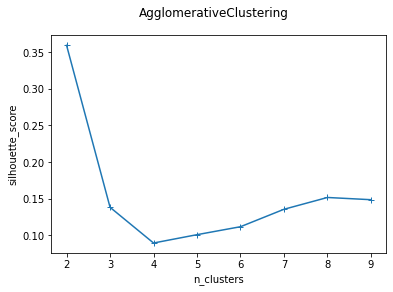

In [25]:
nums=range(2,10)
score=[]
for num in nums:
    clst=AgglomerativeClustering(n_clusters=num)
    y=clst.fit_predict(embedding6)
    score.append(silhouette_score(embedding6,y,sample_size=len(embedding6),metric='euclidean'))

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(nums,score,marker="+")
ax.set_xlabel("n_clusters")
ax.set_ylabel("silhouette_score")
fig.suptitle("AgglomerativeClustering")
plt.show()

In [27]:
clst=AgglomerativeClustering(n_clusters=8)
 
clst.fit_predict(embedding6)

array([6, 1, 6, 4, 2, 7, 6, 2, 2, 4, 1, 4, 1, 0, 4, 5, 3, 0, 0],
      dtype=int64)

In [4]:
for n_category in range(10):
    res = np.array(texts6)[(y_pred == n_category)]
    count = 0
    print(f"Data in category {n_category}:")
    count = 0
    for word in res:
        print(f"{word}\t",end="")
        count = count + 1
        if(count % 10 == 0):
            print(f"\n")

Data in category 0:
山坡拉绳子	Data in category 1:
手拉山	母亲拉手	头拉手	教授拉手	Data in category 2:
一手拉一手	Data in category 3:
老爷爷拉火车	Data in category 4:
水平拉物体	Data in category 5:
马拉车	马拉农具	马拉犁	Data in category 6:
手拉儿子	Data in category 7:
人拉手	大街拉人	人拉肩	Data in category 8:
手榴弹拉火	手拉弹簧	力拉弹簧	Data in category 9:
疤拉疖子	

In [85]:
texts7=["市长推字","头推门","爸爸推门","力量推山","会议推代表","通讯员推炮","国会推总统","战士推车","车推炮","事推事","右手推山","人推大家","手推车","秘书推门","人推车子","人推事","门推门","双手推人","同志推木筏","房间推门","人推步","通讯员推门","工作推大家","床推门","钱推牌九","浪推浪","家推门","车子推车","同志推门","手推门","会议推行政","大会推总统","大家推代表","人推人","车推车","扁担推磨","问题推步","力推东西","孩子推大家","声推门","人推牌九","人推车","门推自行车","人推门","死地推全军","电荷推异种","磁极推名","物体推门","船推船","层推力","力推力","脊推动物","物体推力","火推车"]

In [87]:
from datetime import datetime
import numpy as np
start = datetime.now()
embedding7 = []

for idx, line in enumerate(texts7):
    vector = np.zeros(128)
    
    for word in line:
        
        if word not in model.key_to_index:
            vector += np.zeros(128)
        else:
            vector += model[word]
    embedding7.append(vector)
    if (idx%100==0):
        print(idx)
    
end = datetime.now() 
end-start

0


datetime.timedelta(microseconds=35728)

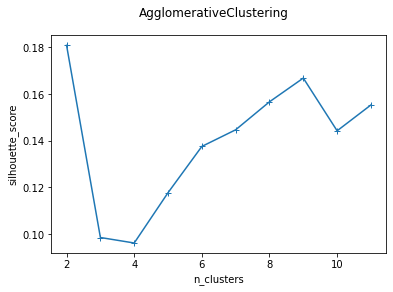

In [90]:
nums=range(2,12)
score=[]
for num in nums:
    clst=AgglomerativeClustering(n_clusters=num)
    y=clst.fit_predict(embedding7)
    score.append(silhouette_score(embedding7,y,sample_size=len(embedding7),metric='euclidean'))

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(nums,score,marker="+")
ax.set_xlabel("n_clusters")
ax.set_ylabel("silhouette_score")
fig.suptitle("AgglomerativeClustering")
plt.show()

In [91]:
clst=AgglomerativeClustering(n_clusters=9)
 
clst.fit_predict(embedding7)

array([2, 6, 5, 7, 8, 1, 8, 0, 0, 4, 6, 2, 6, 5, 0, 4, 5, 6, 3, 5, 0, 1,
       2, 5, 3, 1, 5, 0, 5, 6, 8, 8, 2, 0, 0, 1, 1, 3, 2, 5, 3, 0, 5, 5,
       1, 3, 1, 5, 0, 7, 7, 1, 7, 0], dtype=int64)

In [ ]:
from sklearn.cluster import KMeans
n_clusters=9
kmeans = KMeans(n_clusters, random_state=1).fit(embedding7)
y_pred = kmeans.labels_
cluster_center = kmeans.cluster_centers_

from collections import Counter

center_dict7 = Counter(y_pred)
center_dict7

In [58]:
for n_category in range(9):
    res = np.array(texts7)[(y_pred == n_category)]
    count = 0
    print(f"Data in category {n_category}:")
    count = 0
    for word in res:
        print(f"{word}\t",end="")
        count = count + 1
        if(count % 10 == 0):
            print(f"\n")

Data in category 0:
区域推流域	保修期推用户	无产阶级专政推东西	运动推奴隶制度	问题推帝国主义	宇宙观推政治	士兵推山	会议推代表	国会推总统	国会推实权	

团体推代表	会议推行政	常会推函	实际推理论	文化推高潮	运动推波	国推恩	雕刻家推距离	差异推心理	渊源推我国	

本推源	错处推学生	行动者推山	结构主义推文本	贡献推工业	代表人物推经济学家	远处推劳动者	中学生推人	旗帜推科学	军推恩	

国际上推顶	众人推农业	中央推科长	市长推市长	大臣推业报	大家推经理	会议推国民政府	将领推国民	会议推行政	贤者推贤	

联合会推会长	大家推代表	夫推妇	学科推祖国	组推功课	弟兄推当家人	最后推教授	良种推意义	警推伯	和尚推和尚	

理论推物质	义推奇迹	汉儒推义	作品推封建制度	礼俗推佛教	思路推演绎	定理推公理	公理推结果	概念推立体	论域推理	

电荷推异种	电荷推异种	定律推压强	三代推三代	指示推世界	世界推值	数据推日	学者推气候	思路推系数	关系推太阳	

性质推因素	关系推气流	理论推系统	章推运动	委员推主任	初推体	趋势推分析法	Data in category 1:
问题推债	事变推指挥官	事推事	事推意思	人推事	事儿推省	月亮推事情	人推话	事推领导	事推干部	

Data in category 2:
革履推门	观众推掌声	丈夫推门	门栓推门	门推门	门推股	爸爸推门	店主推门	人员推医院	声响推门	

区长推门	房间推门	秘书推门	红卫兵推小门	舅推门	队部推门	办公室推门	院门推车	糕点推门	门口推门	

同时推门	门推门	草推门	房间推门	通讯员推门	北屋推门	茶房推门	秘书推秘书	声推窗	床推门	

门推窗户	永兴斋推门	女佣人推门	小孩推门	怒火推门	工推门	家推门	师长推门	护士推门	医院推门	

同志推门	教室推座位	寓推门	指挥推门	声推门	家推门	衣服推窗户	大妈推门	门推自行车	人推门	

大夫推门	部门推作用	物体推门	Data in category 3:
马达推车	人群推车	雪花推小车	女人推行李车	铁路推车子	火车推牛皮	大雾推自行车	老工人推板车	学生推自行车	战士推车	

车推炮	车夫推皇	小姐推小车	老师推自行车	自行车推步	车推货色	车推家	眼光推自行车	人推车子	满脸推

In [51]:
texts8=["手拉","人拉","马拉","车拉","头拉","声拉","力拉","绳子拉","火车拉","衣服拉","姑娘拉","家拉","距离拉","格拉","右手拉","时间拉","双手拉","时候拉","妈拉","腿拉","先生拉","大家拉","东西拉","老牛拉","战线拉","男人拉","牛拉","掌拉","子拉","话拉","力气拉","孩子拉","方向拉","老人拉","下意识拉","水拉","音拉","身拉","队拉","网拉","妇拉","兄弟拉","狗拉","车子拉","球拉"]

In [52]:
from datetime import datetime
import numpy as np
start = datetime.now()
embedding8 = []

for idx, line in enumerate(texts8):
    vector = np.zeros(128)
    
    for word in line:
        
        if word not in model.key_to_index:
            vector += np.zeros(128)
        else:
            vector += model[word]
    embedding8.append(vector)
    if (idx%100==0):
        print(idx)
    
end = datetime.now() 
end-start

0


datetime.timedelta(microseconds=996)

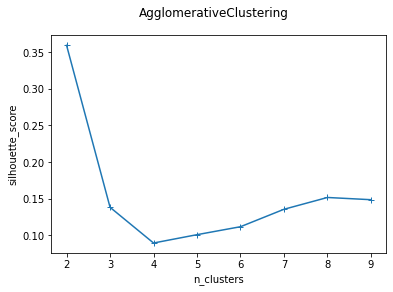

In [53]:
nums=range(2,10)
score=[]
for num in nums:
    clst=AgglomerativeClustering(n_clusters=num)
    y=clst.fit_predict(embedding6)
    score.append(silhouette_score(embedding6,y,sample_size=len(embedding6),metric='euclidean'))

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(nums,score,marker="+")
ax.set_xlabel("n_clusters")
ax.set_ylabel("silhouette_score")
fig.suptitle("AgglomerativeClustering")
plt.show()

In [54]:
clst=AgglomerativeClustering(n_clusters=8)
 
clst.fit_predict(embedding8)

array([7, 2, 0, 0, 7, 0, 5, 3, 0, 0, 3, 0, 4, 0, 7, 1, 7, 1, 0, 7, 0, 0,
       4, 0, 0, 2, 0, 7, 3, 0, 5, 3, 6, 2, 1, 0, 0, 7, 0, 0, 0, 3, 0, 0,
       0], dtype=int64)

In [ ]:
from sklearn.cluster import KMeans
n_clusters=8
kmeans = KMeans(n_clusters, random_state=1).fit(embedding8)
y_pred = kmeans.labels_
cluster_center = kmeans.cluster_centers_

from collections import Counter

center_dict8 = Counter(y_pred)
center_dict8

In [42]:
for n_category in range(4):
    res = np.array(texts8)[(y_pred == n_category)]
    count = 0
    print(f"Data in category {n_category}:")
    count = 0
    for word in res:
        print(f"{word}\t",end="")
        count = count + 1
        if(count % 10 == 0):
            print(f"\n")

Data in category 0:
手拉	头拉	绳子拉	右手拉	双手拉	腿拉	掌拉	下意识拉	Data in category 1:
人拉	时候拉	男人拉	老人拉	Data in category 2:
马拉	车拉	声拉	火车拉	衣服拉	姑娘拉	家拉	距离拉	格拉	时间拉	

妈拉	先生拉	大家拉	东西拉	老牛拉	战线拉	牛拉	子拉	话拉	孩子拉	

方向拉	水拉	音拉	Data in category 3:
力拉	力气拉	

In [69]:
texts9=["拉手","拉胳膊","拉头","拉衣襟","拉衣角","拉嘴","拉脚","拉袖子","拉大家","拉大车","拉心","拉水","拉协奏曲","拉一边","拉泔水","拉低声","拉灯","拉油","拉开关","拉步","拉胡琴","拉客车","拉马","拉洋车","拉家","拉人","拉牛","拉山","拉弹簧","拉犁","拉骆驼","拉风箱","拉车","拉衣服","拉火","拉二胡","拉屎","拉爸爸","拉大嫂","拉队长","拉姑娘","拉丈夫","拉妈","拉妻子","拉妈妈","拉椅子","拉房间","拉车厢","拉话","拉弦","拉门","拉房门"]

In [70]:
from datetime import datetime
import numpy as np
start = datetime.now()
embedding9 = []

for idx, line in enumerate(texts9):
    vector = np.zeros(128)
    
    for word in line:
        
        if word not in model.key_to_index:
            vector += np.zeros(128)
        else:
            vector += model[word]
    embedding9.append(vector)
    if (idx%100==0):
        print(idx)
    
end = datetime.now() 
end-start

0


datetime.timedelta(microseconds=3974)

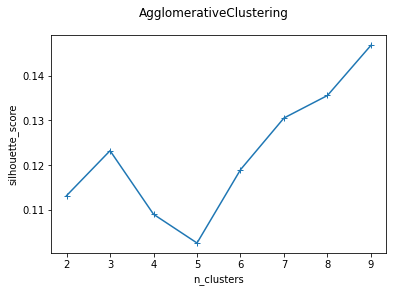

In [71]:
nums=range(2,10)
score=[]
for num in nums:
    clst=AgglomerativeClustering(n_clusters=num)
    y=clst.fit_predict(embedding9)
    score.append(silhouette_score(embedding9,y,sample_size=len(embedding9),metric='euclidean'))

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(nums,score,marker="+")
ax.set_xlabel("n_clusters")
ax.set_ylabel("silhouette_score")
fig.suptitle("AgglomerativeClustering")
plt.show()

In [67]:
clst=AgglomerativeClustering(n_clusters=8)
 
clst.fit_predict(embedding9)

array([0, 0, 0, 5, 5, 0, 0, 6, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 7,
       1, 7, 2, 0, 1, 0, 0, 0, 1, 0, 7, 5, 0, 1, 0, 3, 2, 0, 3, 0, 3, 6,
       3, 6, 4, 7, 0, 0, 4, 4], dtype=int64)

In [ ]:
from sklearn.cluster import KMeans
n_clusters=8
kmeans = KMeans(n_clusters, random_state=1).fit(embedding9)
y_pred = kmeans.labels_
cluster_center = kmeans.cluster_centers_

from collections import Counter

center_dict9 = Counter(y_pred)
center_dict9

In [66]:
for n_category in range(9):
    res = np.array(texts9)[(y_pred == n_category)]
    count = 0
    print(f"Data in category {n_category}:")
    count = 0
    for word in res:
        print(f"{word}\t",end="")
        count = count + 1
        if(count % 10 == 0):
            print(f"\n")

Data in category 0:
拉手	拉双手	拉头	拉床头	拉鬼脸	拉手铐	拉牛头	拉头缆	拉脸	拉两手	

拉刺头	拉右手	Data in category 1:
拉马	拉话	拉开关	拉家常	拉妈	拉家	拉海	拉工作	拉朋友	拉螃蟹	

拉总统	拉家伙	拉麦穗	拉钩	拉表妹	拉伴	拉动作	拉舞蹈	拉闺女	拉泔水	

拉屎	拉铃	拉墨绿色	拉客	拉火	拉秫秸	拉明	拉丈夫	拉犁	拉夫	

拉产妇	拉爹	拉代表	拉处	拉琴	拉秧	拉事故	拉沙	拉磨	拉龙	

拉他家	拉边	拉策略	拉牛	拉主任	拉心	拉情况	拉兵	拉苍蝇	拉电视	

拉爷爷	拉女	拉水	拉股	拉天	拉责任	拉肥料	拉洋片	拉老婆	拉铧犁	

拉嫌疑犯	拉格	拉石料	Data in category 2:
拉沟鼠	拉广场	拉组	拉山	拉餐馆	拉两下	拉团	拉低声	拉社	拉民团	

拉军长	拉后园	拉队长	拉最后	拉公园	拉亚军	拉老乡	拉队	拉营业所	拉体操队	

拉蚂蚁	拉组长	拉外村	拉部分	拉房间	拉医师	拉甲虫	拉派出所	拉轻声	拉牲口	

拉社长	拉团长	Data in category 3:
拉里间	拉心里话	拉空间	Data in category 4:
拉风箱	拉车	拉弦	拉洋车	拉一边	拉耳朵	拉衣襟	拉嘴	拉脚	拉衣服	

拉步	拉弹簧	拉衣角	拉房门	拉门	拉缰绳	拉车道	拉土豆	拉石碾	拉墙角	

拉操纵杆	拉油	拉灯	拉桌	拉长椅	拉墙	拉地	拉枪	拉导火线	拉炕	

拉刀	拉袋	拉后腿	拉街道	拉牌桌	拉茶花	拉肩膀	拉一溜	拉圈	拉脚步	

拉泪花	拉地藏庵	拉车场	拉弓弦	拉墙根	拉一角	拉一阵风	拉颈	拉客车	拉货车	

拉车厢	拉将门	拉列车	拉歪道	拉胳膊	拉橡皮	Data in category 5:
拉老太太	Data in category 6:
拉人	拉男人	拉歌	拉字	拉女人	拉诗	拉诗人	Data in category 7:
拉协奏曲	拉胡琴	拉骆驼	拉白娘观	拉水田	拉孙子	拉孙娃	拉红卫兵	拉文章	拉雷	

拉二胡	拉壮丁	拉方向	Data in category 8:
拉大门	拉大娘	拉爸爸	拉大夫	拉妈妈	拉小调	拉姑奶奶	拉大伯	拉高个子	拉姑娘	

拉大哥	拉大家	拉大嫂	拉大车	Data in category 9:
拉袖子	拉杆

In [73]:
texts10=["人推","手推","门推","力量推","车推","事推","车子推","工作推","头推","问题推","棒推","石头推","地推","钱推","家推","大家推","电荷推"]

In [74]:
from datetime import datetime
import numpy as np
start = datetime.now()
embedding10 = []

for idx, line in enumerate(texts10):
    vector = np.zeros(128)
    
    for word in line:
        
        if word not in model.key_to_index:
            vector += np.zeros(128)
        else:
            vector += model[word]
    embedding10.append(vector)
    if (idx%100==0):
        print(idx)
    
end = datetime.now() 
end-start

0


datetime.timedelta(microseconds=14960)

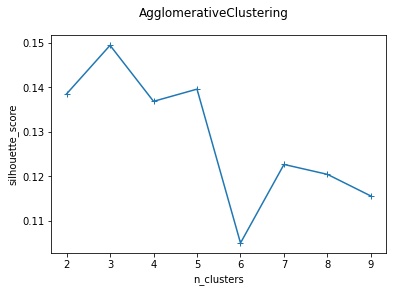

In [75]:
nums=range(2,10)
score=[]
for num in nums:
    clst=AgglomerativeClustering(n_clusters=num)
    y=clst.fit_predict(embedding10)
    score.append(silhouette_score(embedding10,y,sample_size=len(embedding10),metric='euclidean'))

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(nums,score,marker="+")
ax.set_xlabel("n_clusters")
ax.set_ylabel("silhouette_score")
fig.suptitle("AgglomerativeClustering")
plt.show()

In [77]:
clst=AgglomerativeClustering(n_clusters=8)
 
clst.fit_predict(embedding10)

array([1, 7, 2, 5, 2, 0, 2, 1, 3, 0, 1, 3, 1, 1, 6, 6, 4], dtype=int64)

In [ ]:
from sklearn.cluster import KMeans
n_clusters=8
kmeans = KMeans(n_clusters, random_state=1).fit(embedding10)
y_pred = kmeans.labels_
cluster_center = kmeans.cluster_centers_

from collections import Counter

center_dict10 = Counter(y_pred)
center_dict10

In [72]:
for n_category in range(8):
    res = np.array(texts10)[(y_pred == n_category)]
    count = 0
    print(f"Data in category {n_category}:")
    count = 0
    for word in res:
        print(f"{word}\t",end="")
        count = count + 1
        if(count % 10 == 0):
            print(f"\n")

Data in category 0:
气力推	力量推	Data in category 1:
机器推	石头推	书推	笔记本推	石坡推	钱推	勤务兵推	眼镜推	Data in category 2:
办公室推	父亲推	爷爷推	家伙推	姑娘推	教授推	爹推	医生推	他家推	家当推	

小孩子推	乡亲推	大家推	家推	Data in category 3:
时事教育推	事情推	事推	往事推	事业推	Data in category 4:
空车推	车推	车子推	车门推	三轮车推	汽车推	货车推	Data in category 5:
上司推	对方推	公司推	脊梁推	丘八推	步推	时候推	庞然大物推	儿童推	内容推	

Data in category 6:
同志们推	朋友们推	Data in category 7:
工作推	企业推	数目字推	案情推	茶杯推	手推	肘推	刻刀推	操纵杆推	句推	

时刻推	法推	责任推	问题推	势推	音节推	后继者推	例推	蜡烛推	害处推	

戏推	驼背推	角推	头推	地窨推	脑门推	人推	瓶推	专业推	师长推	

转经轮推	食指推	炕推	女的推	贼推	脸色推	胳膊推	八路推	火坑推	地推	

身体推	借口推	姿势推	篮推	门推	局长推	信推	蛇推	教导员推	腕推	

山推	苕帚推	个性推	水浪推	班推	宝座推	碗推	结果推	脚推	工具推	

一溜推	当胸推	得失推	泥土推	棋推	期限推	手法推	佛陀推	功推	知识推	

结论推	可怜相推	棒推	电荷推	弹簧推	产品推	Data in category 8:
高处推	高潮推	Data in category 9:
蒙面人推	

In [81]:
texts11=["推门","推车","推车子","推人","推自行车","推小车","推步","推东西","推牌九","推大家","推字","推水","推弓","推光","推声"]

In [82]:
from datetime import datetime
import numpy as np
start = datetime.now()
embedding11 = []

for idx, line in enumerate(texts11):
    vector = np.zeros(128)
    
    for word in line:
        
        if word not in model.key_to_index:
            vector += np.zeros(128)
        else:
            vector += model[word]
    embedding11.append(vector)
    if (idx%100==0):
        print(idx)
    
end = datetime.now() 
end-start

0


datetime.timedelta(microseconds=6981)

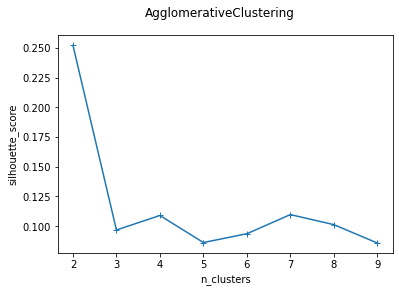

In [83]:
nums=range(2,10)
score=[]
for num in nums:
    clst=AgglomerativeClustering(n_clusters=num)
    y=clst.fit_predict(embedding11)
    score.append(silhouette_score(embedding11,y,sample_size=len(embedding11),metric='euclidean'))

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(nums,score,marker="+")
ax.set_xlabel("n_clusters")
ax.set_ylabel("silhouette_score")
fig.suptitle("AgglomerativeClustering")
plt.show()

In [1]:
clst=AgglomerativeClustering(n_clusters=7)
 
clst.fit_predict(embedding11)

NameError: name 'AgglomerativeClustering' is not defined

In [ ]:
from sklearn.cluster import KMeans
n_clusters=7
kmeans = KMeans(n_clusters, random_state=1).fit(embedding11)
y_pred = kmeans.labels_
cluster_center = kmeans.cluster_centers_

from collections import Counter

center_dict11 = Counter(y_pred)
center_dict11

In [78]:
for n_category in range(7):
    res = np.array(texts11)[(y_pred == n_category)]
    count = 0
    print(f"Data in category {n_category}:")
    count = 0
    for word in res:
        print(f"{word}\t",end="")
        count = count + 1
        if(count % 10 == 0):
            print(f"\n")

Data in category 0:
推墙壁	推西皮	推鞋垫	推胶布	推油漆	推衣服	推油桶	Data in category 1:
推绳头	推木头	Data in category 2:
推小伙子	推一辈子	推车子	推妻子	推力量	推轮子	推儿子	推气力	推木轮	Data in category 3:
推政府	推耳朵	Data in category 4:
推物理	推途径	Data in category 5:
推鼻梁	推历史	推对方	Data in category 6:
推眼镜	推眼泪	Data in category 7:
推民	推意思	推佛教	推天皇	推朋友	推爸爸	推人生	推政治	推源	推道德	

推距离	推事实	推原由	推大家	推共产党人	推政委	推面	推人	推字	推中央	

推家	推公寓	推声	推东西	推研究所	Data in category 8:
推自行车	推工作	推遗体	推女尸	推门	推所得	推身体	推水	推弓	推窗	

推光	推牌九	推杯	推把	推背	推炕	推车	推后背	推墙	推内室	

推妇女	推市长	推门房	推坡	推面额	推塘	推横	推妹	推土	推好歹	

推步	推跤	推位	推架	推钱	推蚂蚁	推砂	推箱	推老伴	推煤	

推数	推猫	推铁	推号	推乙	推小车	推粪	推地	推梢	推大门	

推多元	推三角形	推系统	Data in category 9:
推公园	推白莲教	推唐禅院	推社会	推山丘	